<a href="https://colab.research.google.com/github/lewinskie254/eda/blob/main/Anova_On_Steroids.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import statistics as stat
import scipy.stats as stats

In [2]:
#one way anova is categorical to numeric relationships
df = pd.read_csv("http://ishelp.info/data/bikebuyers.csv")

In [3]:
df.head()

,ID,Marital Status,Gender,MaritalStatusNumeric,GenderNumeric,Income,Children,EducationNumeric,CommuteDistanceNumeric,Cars,Age,HomeOwnerNumeric,PurchaseBikeNumeric,Education,Occupation,Home Owner,Commute Distance,Region,Purchased Bike
0,19147,Married,Male,1,0,40000,0,4,1,1,42,0,0,Bachelors,Professional,No,0-1 Miles,North America,No
1,22296,Married,Male,1,0,70000,0,4,1,1,38,0,0,Bachelors,Professional,No,0-1 Miles,North America,No
2,25983,Married,Male,1,0,70000,0,4,1,1,43,0,0,Bachelors,Professional,No,0-1 Miles,North America,No
3,29134,Married,Male,1,0,60000,4,4,5,3,42,0,0,Bachelors,Skilled Manual,No,10+ Miles,North America,No
4,27388,Married,Male,1,0,60000,3,4,2,2,66,0,0,Bachelors,Management,No,1-2 Miles,North America,No


In [6]:
d_types = {col : [df[col].dtype, df[col].nunique()] for col in df.columns}

In [7]:
d_types

{'ID': [dtype('int64'), 1000],
 'Marital Status': [dtype('O'), 2],
 'Gender': [dtype('O'), 2],
 'MaritalStatusNumeric': [dtype('int64'), 2],
 'GenderNumeric': [dtype('int64'), 2],
 'Income': [dtype('int64'), 16],
 'Children': [dtype('int64'), 6],
 'EducationNumeric': [dtype('int64'), 5],
 'CommuteDistanceNumeric': [dtype('int64'), 5],
 'Cars': [dtype('int64'), 5],
 'Age': [dtype('int64'), 53],
 'HomeOwnerNumeric': [dtype('int64'), 2],
 'PurchaseBikeNumeric': [dtype('int64'), 2],
 'Education': [dtype('O'), 5],
 'Occupation': [dtype('O'), 5],
 'Home Owner': [dtype('O'), 2],
 'Commute Distance': [dtype('O'), 5],
 'Region': [dtype('O'), 3],
 'Purchased Bike': [dtype('O'), 2]}

In [12]:
categorical_data_types = [col for col in df.columns if df[col].dtype == "object"]

In [14]:
categorical_details = {col : df[col].unique() for col in categorical_data_types}

In [15]:
categorical_details

{'Marital Status': array(['Married', 'Single'], dtype=object),
 'Gender': array(['Male', 'Female'], dtype=object),
 'Education': array(['Bachelors', 'Graduate Degree', 'High School', 'Partial College',
        'Partial High School'], dtype=object),
 'Occupation': array(['Professional', 'Skilled Manual', 'Management', 'Clerical',
        'Manual'], dtype=object),
 'Home Owner': array(['No', 'Yes'], dtype=object),
 'Commute Distance': array(['0-1 Miles', '10+ Miles', '1-2 Miles', '2-5 Miles', '5-10 Miles'],
       dtype=object),
 'Region': array(['North America', 'Europe', 'Pacific'], dtype=object),
 'Purchased Bike': array(['No', 'Yes'], dtype=object)}

Text(6.042874999999997, 0.5, 'Density')

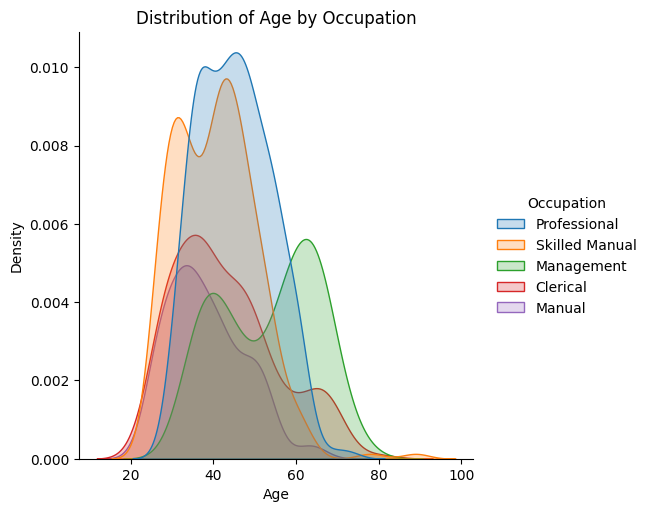

In [19]:
sns.displot(df, x='Age', hue='Occupation', kind='kde', fill=True)
plt.title("Distribution of Age by Occupation")
plt.xlabel("Age")
plt.ylabel("Density")

In [22]:
#number of married people that bought bikes

married = df[df["Marital Status"] == "Married"]
single = df[df["Marital Status"] == "Single"]

In [23]:
married_purchased = married[married["Purchased Bike"] == "Yes"]
single_purchased = single[single["Purchased Bike"] == "Yes"]

married_not_purchased = married[married["Purchased Bike"] == "No"]
single_not_purchased = single[single["Purchased Bike"] == "No"]

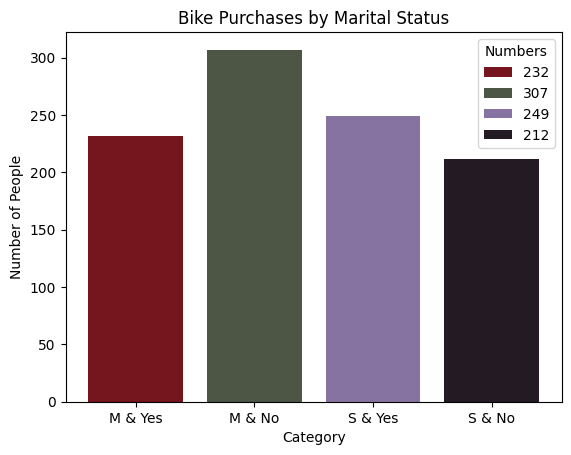

[232, 307, 249, 212]

In [40]:
list_of_married = [married_purchased, married_not_purchased]
list_of_single = [single_purchased, single_not_purchased]

purchased = ["M & Yes", "M & No", "S & Yes", "S & No"]
comprehensive_list = [len(i) for i in list_of_married] + [len(j) for j in list_of_single]
colors = ['#75151E', '#4D5645', "#8673A1", "#231A24"]

# Add labels directly inside plt.bar
plt.bar(purchased, comprehensive_list, color=colors, label=purchased)

# Create the legend
plt.legend(labels=comprehensive_list, title="Numbers")

plt.title("Bike Purchases by Marital Status")
plt.xlabel("Category")
plt.ylabel("Number of People")
plt.show()

comprehensive_list


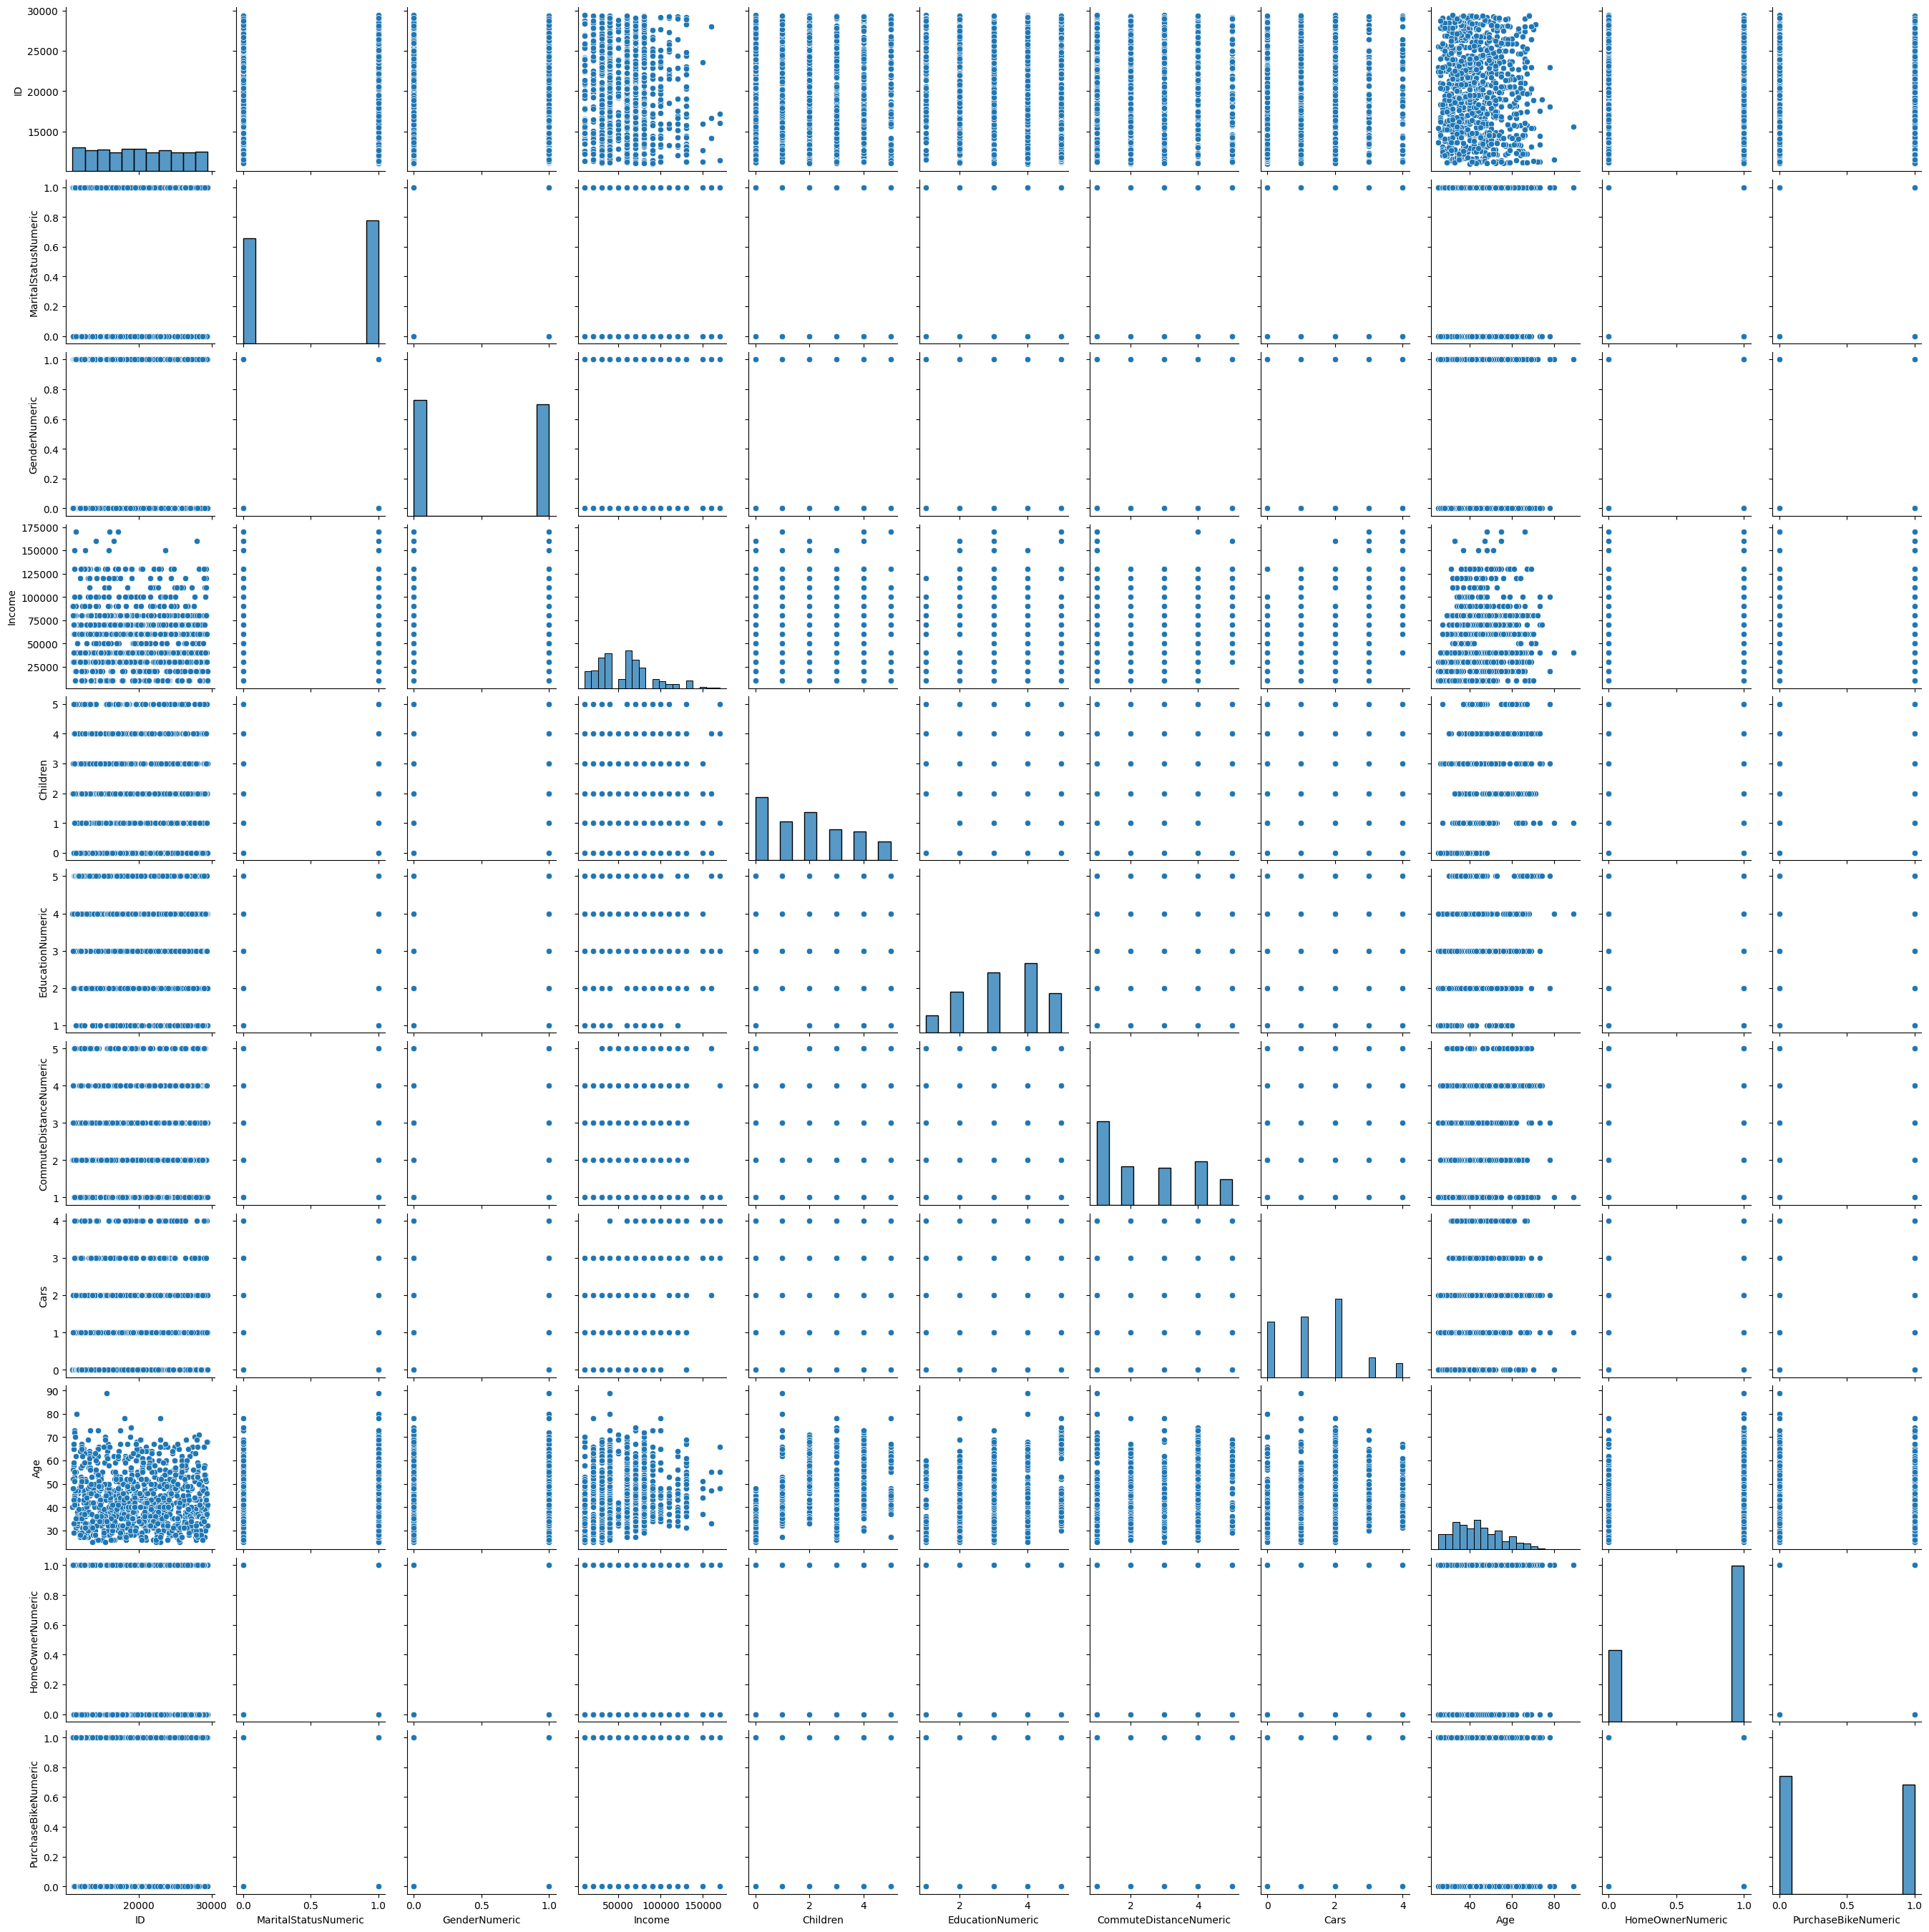

In [46]:
sns.pairplot(df)